# **Simulacion de Monte Carlo**
**Damian Lugo 10149601**

En los sistemas de comunicación LTE y 5G, el canal de acceso aleatorio (RACH) permite que los equipos de usuario (UEs) inicien la conexión con la red. Este proceso comienza con la selección de un preámbulo, de entre un conjunto limitado de opciones ortogonales. Si dos o más UEs eligen el mismo preámbulo en la misma oportunidad de acceso, ocurre una colisión, impidiendo el acceso exitoso. Comprender la probabilidad de colisión y cómo esta se ve afectada por el número de usuarios o preámbulos es clave para optimizar el rendimiento de la red. Para ello, se utiliza una simulación Monte Carlo que permite estimar empíricamente dicha probabilidad en distintos escenarios.

**Problema:**
En una celda LTE / 5G, los equipos de usuario (UE) emplean el Random Access Channel (RACH) para solicitar conexión.

El estándar define 64 preámbulos ortogonales posibles **(P = 64)**.

Suponga que, en un mismo “Random Access Opportunity”, **N = 30** UEs intentan acceder simultáneamente y cada uno elige su preámbulo al azar con la misma probabilidad.


In [11]:
import numpy as np
import matplotlib.pyplot as plt


 Creamos la función de simulación para estimar la probabilidad de las colisiónes 

In [12]:
def simular_colision(num_UEs, num_preambulos, iteraciones=10000):
    colisiones = 0
    
    for _ in range(iteraciones):
        seleccion = np.random.randint(0, num_preambulos, num_UEs)
        if len(np.unique(seleccion)) < num_UEs:
            colisiones += 1
    
    probabilidad = colisiones / iteraciones
    return probabilidad


Evaluamos la probabilidad para N = 30 UEs y P = 64

In [13]:
P = 64
N = 30
probabilidad_colision = simular_colision(N, P)
print(f'Probabilidad de colisión para N={N}, P={P}: {probabilidad_colision:.4f}')


Probabilidad de colisión para N=30, P=64: 0.9999


Buscamos el N donde la probabilidad supera 50%

In [14]:
P = 64
iteraciones = 5000
umbral = 0.5

for N in range(1, P+30):
    prob = simular_colision(N, P, iteraciones)
    print(f'N = {N}, Probabilidad = {prob:.4f}')
    if prob >= umbral:
        print(f'Para N = {N}, la probabilidad supera el 50%')
        break


N = 1, Probabilidad = 0.0000
N = 2, Probabilidad = 0.0140
N = 3, Probabilidad = 0.0484
N = 4, Probabilidad = 0.0886
N = 5, Probabilidad = 0.1472
N = 6, Probabilidad = 0.2090
N = 7, Probabilidad = 0.3008
N = 8, Probabilidad = 0.3574
N = 9, Probabilidad = 0.4486
N = 10, Probabilidad = 0.5376
Para N = 10, la probabilidad supera el 50%


Simulamos cómo varía la probabilidad de colisión al aumentar la cantidad de UEs que intentan acceder simultáneamente al canal RACH, manteniendo constante la cantidad de preámbulos en 64. Realicé 5000 iteraciones por cada valor de N desde 0 hasta 50, y graficé los resultados. Esta gráfica muestra que, a mayor cantidad de UEs, la probabilidad de colisión se incrementa progresivamente.

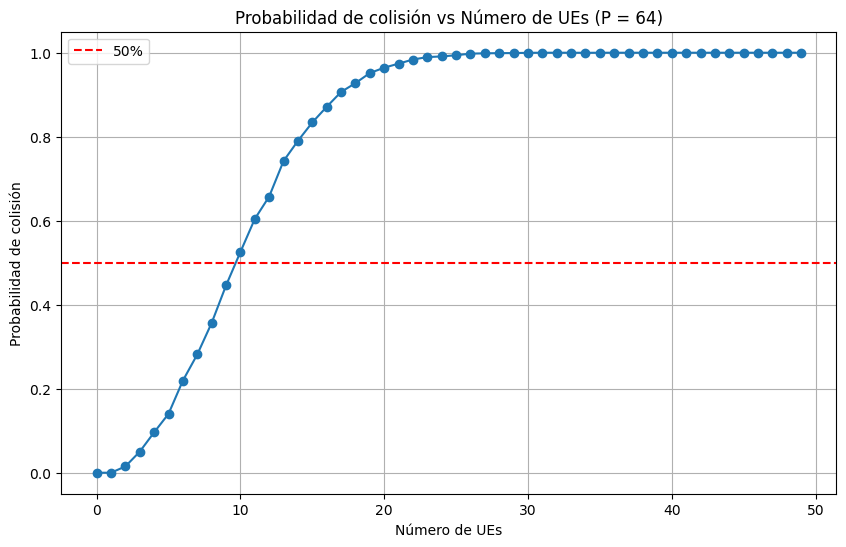

In [15]:
P = 64
iteraciones = 5000
valores_N = range(0, 50, 1)
probabilidades = [simular_colision(N, P, iteraciones) for N in valores_N]

plt.figure(figsize=(10,6))
plt.plot(valores_N, probabilidades, marker='o')
plt.axhline(y=0.5, color='r', linestyle='--', label='50%')
plt.title(f'Probabilidad de colisión vs Número de UEs (P = {P})')
plt.xlabel('Número de UEs')
plt.ylabel('Probabilidad de colisión')
plt.grid(True)
plt.legend()
plt.show()


Simulé cómo varía la probabilidad de colisión cuando 30 UEs intentan acceder al canal RACH al mismo tiempo, probando distintos valores de preámbulos disponibles (P). Realicé 5000 iteraciones por cada valor de P y luego graficé los resultados para visualizar cómo, al aumentar la cantidad de preámbulos, la probabilidad de colisión disminuye.


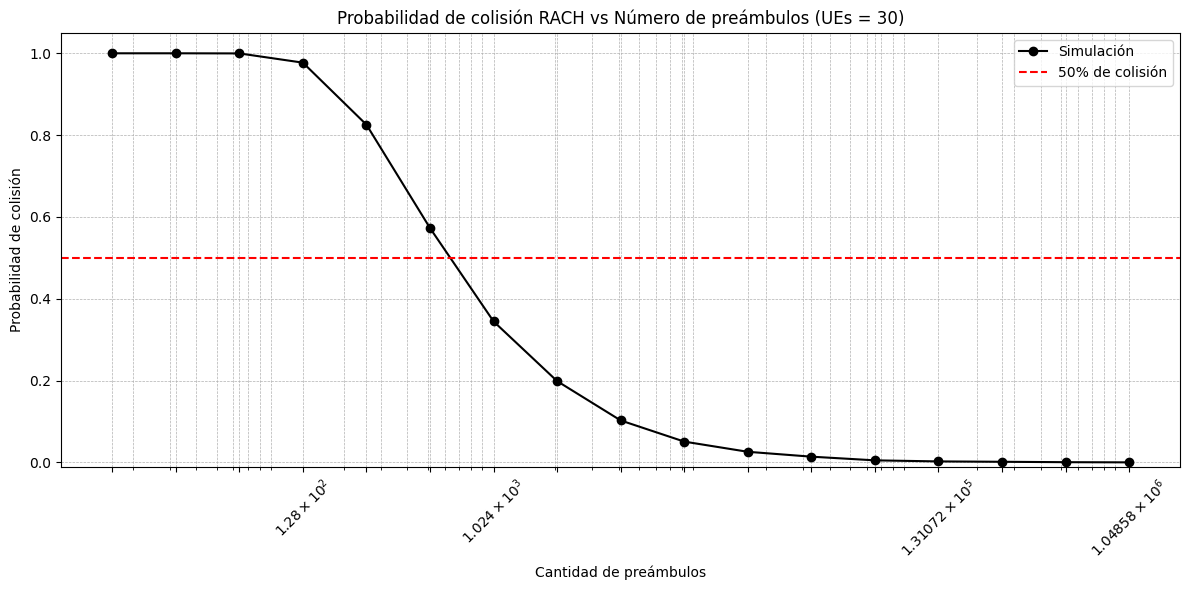

In [16]:
N = 30
iteraciones = 10000

# Lista fija de preámbulos (potencias de 2 extendidas)
valores_P = [16, 32, 64, 128, 256, 512, 1024, 2048,
             4096, 8192, 16384, 32768, 65536, 131072, 262144, 524288, 1048576]

# Cálculo de probabilidades
probabilidades_P = [simular_colision(N, P, iteraciones) for P in valores_P]

# Gráfica
plt.figure(figsize=(12,6))
plt.plot(valores_P, probabilidades_P, marker='o', color='black', label='Simulación')
plt.axhline(0.5, color='red', linestyle='--', label='50% de colisión')
plt.xlabel('Cantidad de preámbulos')
plt.ylabel('Probabilidad de colisión')
plt.title(f'Probabilidad de colisión RACH vs Número de preámbulos (UEs = {N})')
plt.xscale('log')
plt.xticks(valores_P, rotation=45)
plt.ylim(-0.01, 1.05)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.legend()
plt.tight_layout()
plt.show()

# **Análisis de la simulación y sus resultados**

Se definieron 64 preámbulos posibles y se estudió la probabilidad de colisión para distintos números de UEs. Con 30 UEs intentando acceder simultáneamente, la probabilidad de colisión fue de 0.9996, es decir, prácticamente segura.

Posteriormente, se buscó el valor mínimo de UEs (N) para el cual la probabilidad de colisión supera el 50%, y se encontró que basta con 10 UEs para alcanzar ese umbral. A partir de ahí, se graficó la probabilidad de colisión conforme se incrementaba el número de UEs. Se observó un patrón claro, la probabilidad de colisión crece exponencialmente con el número de UEs, dado el número fijo de preámbulos.

En una segunda etapa, se mantuvo constante el número de UEs en 30, y se analizaron distintos valores de preámbulos posibles desde 1 hasta 50,000. Se comprobó que a mayor cantidad de preámbulos, menor es la probabilidad de colisión, lo cual es esperable al haber más opciones disponibles para que los UEs se distribuyan.



# **Conclusion**

La simulación realizada permite concluir que la probabilidad de colisión en el canal de acceso aleatorio (RACH) de una red LTE/5G depende fuertemente tanto del número de equipos de usuario (UEs) que intentan acceder simultáneamente como de la cantidad de preámbulos disponibles. A medida que aumenta el número de UEs, la probabilidad de colisión crece rápidamente, superando el 50% con tan solo 10 usuarios para 64 preámbulos. Por otro lado, incrementar el número de preámbulos reduce significativamente dicha probabilidad, lo que resalta la importancia de ajustar este parámetro según la carga esperada de la red. Estos resultados, obtenidos mediante simulaciones Monte Carlo, ofrecen una base sólida para tomar decisiones sobre el diseño y dimensionamiento de los recursos de acceso aleatorio en redes móviles modernas.
